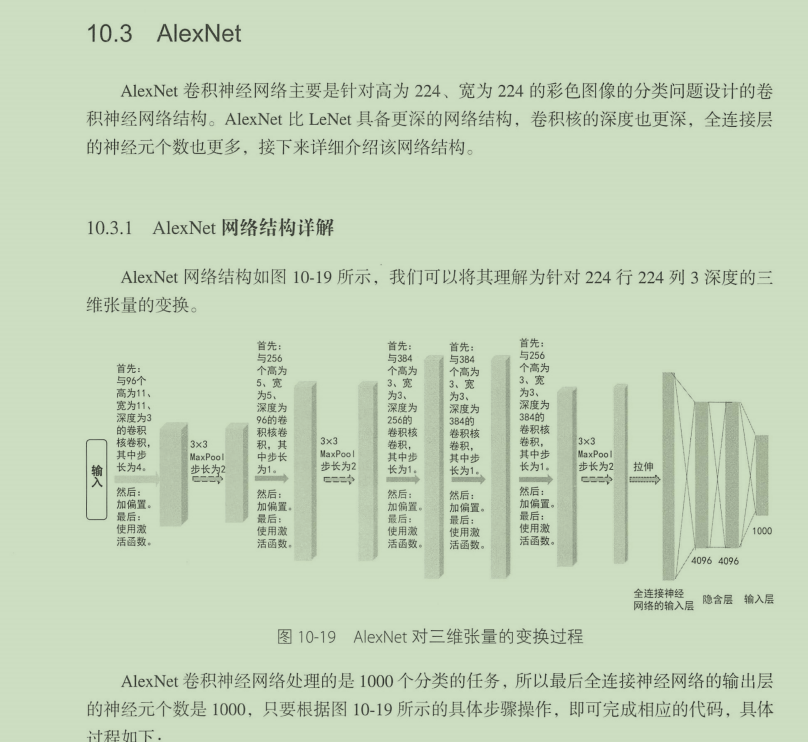

In [1]:
import tensorflow as tf
import numpy as np

E:\ProgramData\Anaconda3_1\envs\tensorflow-1-5\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\ProgramData\Anaconda3_1\envs\tensorflow-1-5\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\ProgramData\Anaconda3_1\envs\tensorflow-1-5\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\ProgramData\Anaconda3_1\envs\tensorfl

In [2]:
# 输入
x=tf.placeholder(tf.float32, [None, 224,224,3])
keep_prob=tf.placeholder(tf.float32)  # drop 参数

# 第一步
# 1.1,与96个11x11x3的卷积核卷积, 
w1=tf.Variable(tf.random_normal([11,11,3,96]), dtype=tf.float32, name='w1')
l1=tf.nn.conv2d(x, w1 ,[1,4,4,1], 'SAME')
# 1.2, 加上偏置
b1=tf.Variable(tf.random_normal([96]), dtype=tf.float32, name='b1')
l1=tf.nn.bias_add(l1,b1)
# 1.3,使用激活函数relue
l1=tf.nn.relu(l1)
# 1.4 , 2x2最大值池化操作, 移动步长为2
pool_l1=tf.nn.max_pool(l1, [1,2,2,1],[1,2,2,1], 'SAME')



In [3]:
# 第二步
# 2.1,与256个5x5x96的卷积核卷积, 
w2=tf.Variable(tf.random_normal([5,5,96,256]), dtype=tf.float32, name='w2')
l2=tf.nn.conv2d(pool_l1, w2 ,[1,1,1,1], 'SAME')
# 2.2 加上偏置
b2=tf.Variable(tf.random_normal([256]), dtype=tf.float32, name='b2')
l2=tf.nn.bias_add(l2,b2)
# 2.3 使用激活函数
l2=tf.nn.relu(l2)
# 2.4 , 2x2最大值池化操作, 移动步长为2
pool_l2=tf.nn.max_pool(l2, [1,2,2,1],[1,2,2,1], 'SAME')

In [4]:
# 第三步
# 3.1,与384个3x3x256的卷积核卷积, 
w3=tf.Variable(tf.random_normal([3,3,256,384]), dtype=tf.float32, name='w3')
l3=tf.nn.conv2d(pool_l2, w3 ,[1,1,1,1], 'SAME')
# 3.2 加上偏置
b3=tf.Variable(tf.random_normal([384]), dtype=tf.float32, name='b3')
l3=tf.nn.bias_add(l3,b3)
# 3.3 使用激活函数
l3=tf.nn.relu(l3)

In [5]:
# 第四步
# 4.1,与384个3x3x384的卷积核卷积, 
w4=tf.Variable(tf.random_normal([3,3,384,384]), dtype=tf.float32, name='w4')
l4=tf.nn.conv2d(l3, w4 ,[1,1,1,1], 'SAME')
# 4.2 加上偏置
b4=tf.Variable(tf.random_normal([384]), dtype=tf.float32, name='b4')
l4=tf.nn.bias_add(l4,b4)
# 4.3 使用激活函数
l4=tf.nn.relu(l4)

In [6]:
# 第五步
# 5.1,与256个3x3x384的卷积核卷积, 
w5=tf.Variable(tf.random_normal([3,3,384,256]), dtype=tf.float32, name='w5')
l5=tf.nn.conv2d(l4, w5 ,[1,1,1,1], 'SAME')
# 5.2 加上偏置
b5=tf.Variable(tf.random_normal([256]), dtype=tf.float32, name='b5')
l5=tf.nn.bias_add(l5,b5)
# 5.3 使用激活函数
l5=tf.nn.relu(l5)
# 5.4 2x2最大值池化操作,移动步长为2
pool_l5=tf.nn.max_pool(l5,[1,2,2,1],[1,2,2,1] ,'SAME')


# 5.5 拉伸, 作为全连接神经网络的输入层
pool_l5_shape=pool_l5.get_shape()
num=pool_l5_shape[1].value * pool_l5_shape[2].value * pool_l5_shape[3].value 
flatten=tf.reshape(pool_l5, [-1 , num])

# 以下是全连接神经网络

In [7]:
# 第1个隐含层
fcW1 = tf.Variable(tf.random_normal([num,4096]) , dtype=tf.float32, name='fcW1')
fc_l1=tf.matmul(flatten,fcW1)
fcb1=tf.Variable(tf.random_normal([4096]) ,dtype=tf.float32, name='fcb1')
fc_l1=tf.nn.bias_add(fc_l1, fcb1)
fc_l1=tf.nn.relu(fc_l1)
fc_l1=tf.nn.dropout(fc_l1, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# 第2个隐含层
fcW2 = tf.Variable(tf.random_normal([4096,4096]) , dtype=tf.float32, name='fcW2')
fc_l2=tf.matmul(fc_l1,fcW2)
fcb2=tf.Variable(tf.random_normal([4096]) ,dtype=tf.float32, name='fcb2')
fc_l2=tf.nn.bias_add(fc_l2, fcb2)
fc_l2=tf.nn.relu(fc_l2)
fc_l2=tf.nn.dropout(fc_l2, keep_prob)

In [9]:
# 输出层
fcW3 = tf.Variable(tf.random_normal([4096,1000]) , dtype=tf.float32, name='fcW3')
out=tf.matmul(fc_l2,fcW3)
fcb3=tf.Variable(tf.random_normal([1000]) ,dtype=tf.float32, name='fcb3')
out=tf.nn.bias_add(out, fcb3)
out=tf.nn.relu(out)

In [10]:
# 创建会话
session=tf.Session()
session.run(tf.global_variables_initializer())
result=session.run(out , feed_dict={x:np.ones([2,224,224,3] ,np.float32) ,keep_prob:0.5})


#打印最后的输出尺寸
print(np.shape(result))

(2, 1000)


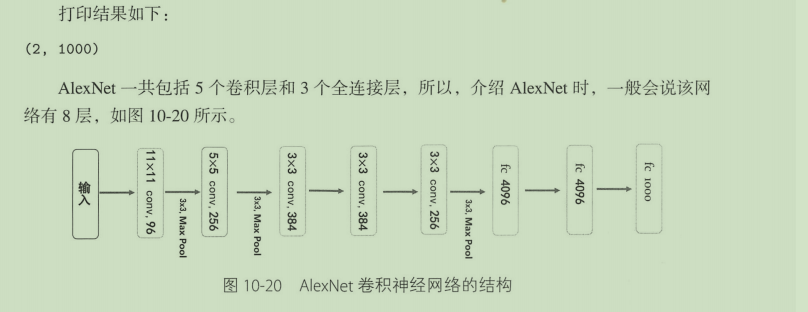